In [11]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
import os


Text(0.5, 1.0, 'Ligand RMSD over Time')

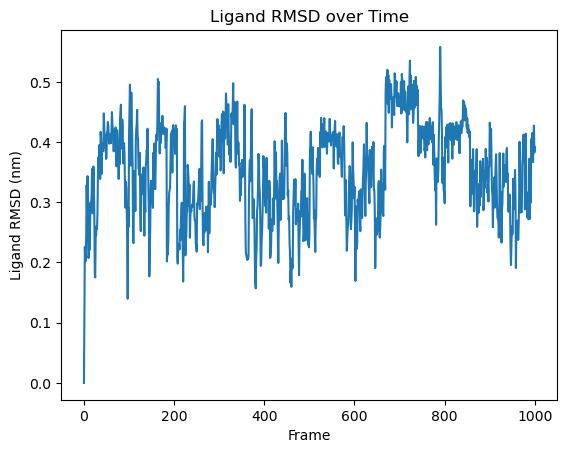

In [12]:
gmx_files = 'replicate_0/md_pbc_fit.xtc'
gmx_top_file = 'replicate_0/md.gro'
traj = md.load(gmx_files, top=gmx_top_file)
# traj.image_molecules(inplace=True)
atom_indices = traj.topology.select('resname UNK')
traj.superpose(traj, frame=0, atom_indices=atom_indices)
# traj.save('gromacs/REMD_1/replicate_0/md_processed.xtc')
# Calculate RMSD of ligand heavy atoms
result = traj.xyz[:, atom_indices, :] - traj.xyz[0, atom_indices, :]
ligand_rmsd = np.sqrt((result ** 2).sum(axis=-1).mean(axis=-1))
frames = np.arange(len(ligand_rmsd))
plt.plot(frames, ligand_rmsd)
plt.xlabel('Frame')
plt.ylabel('Ligand RMSD (nm)')
plt.title('Ligand RMSD over Time')